<a href="https://colab.research.google.com/github/imPhacko/PublicProjects/blob/main/Keras_and_Testing_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training, validation, testing

Evaluating a model's performance on its training dataset produces a biased result. The way a model performs on the data which was used to tune its parameters does not necesserily match how it'll perform on new, unseen data points. To evaluate a model accurately a separate dataset is needed. If all we have is a single dataset this can be achieved by randomly splitting the available data into training and testing subsets. Commonly used split proportions include 70-30, 80-20, 90-10 and many others.

However, the more we test on our testing dataset the more biased these results become as well. This is especially important when selecting hyperparameters (such as learning rate, number of epochs, number of neurons, number of layers, etc.), as hyperparameter selection requires evaluating the results of each model as accurately as possible. To mitigate this a third dataset is often used called the validation dataset. Commonly used split proportions for training-validation-testing subsets include 60-20-20, 70-20-10 and many others.

The ideal model creation loop should look like this:

1. Select model hyperparameters
2. Train on the training dataset
3. Validate on the validation dataset
4. Repeat steps 1 to 3 until results are satisfactory
5. Test once on the testing dataset (and obtain final performance metrics of the model)

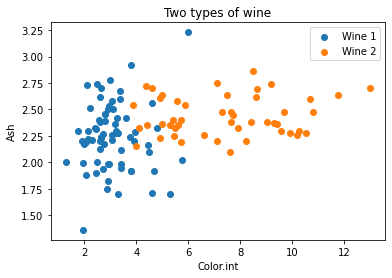

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/datasets/wine.csv")

data = data[data["Wine"] != 1]

wine1 = data[data["Wine"] == 2]
wine2 = data[data["Wine"] == 3]
input_attributes = ["Color.int", "Ash"]

plt.scatter(wine1["Color.int"], wine1["Ash"], label="Wine 1")
plt.scatter(wine2["Color.int"], wine2["Ash"], label="Wine 2")
plt.title("Two types of wine")

plt.xlabel("Color.int")
plt.ylabel("Ash")
plt.legend()

In [ ]:
import numpy as np
# Let's convert these tables to something that could be fed to our model
# What we're looking for is an array with our dependent variables (bias, Alcohol and Hue)
# And an array with our expected predictions (either 0 or 1) indicating which category out
# of the 2 the wine belongs to

total_samples = len(wine1) + len(wine2)
X_train = np.ones((total_samples, 2), dtype=np.float32) # First column for Alcohol and second for Hue
X_train[:len(wine1)] = wine1[input_attributes].to_numpy()
X_train[len(wine1):] = wine2[input_attributes].to_numpy()

y_train = np.zeros((total_samples, 1), dtype=np.float32) # Just one column which will be either 0 or 1
y_train[len(wine1):] = 1

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

mean = np.mean(X_train, axis=0)
stddev = np.std(X_train, axis=0)

X_train = (X_train - mean) / stddev

X_train shape: (119, 2), y_train shape: (119, 1)


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="tanh"),
    tf.keras.layers.Dense(32, activation="tanh"),
    tf.keras.layers.Dense(32, activation="tanh"),
    tf.keras.layers.Dense(32, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

model.fit(X_train, y_train, epochs=5000, batch_size=64, verbose=0)
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print(f"Accuracy: {accuracy:.4f}")

4/4 - 0s - loss: 5.6731e-04 - accuracy: 1.0000 - 145ms/epoch - 36ms/step
Accuracy: 1.0000


In [ ]:
xx, yy = np.mgrid[0:14:0.05, 0:4:0.005]
grid = (np.c_[xx.ravel(), yy.ravel()] - mean) / stddev
probs = model.predict(grid).T.reshape(xx.shape)

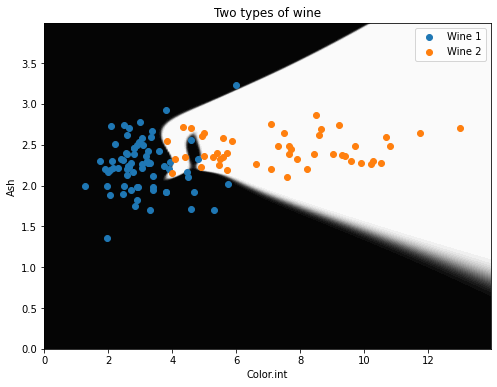

In [ ]:
contour = plt.contourf(xx, yy, probs, 25, cmap="gray", vmin=0, vmax=1)

plt.scatter(wine1["Color.int"], wine1["Ash"], label="Wine 1")
plt.scatter(wine2["Color.int"], wine2["Ash"], label="Wine 2")
plt.title("Two types of wine")

plt.xlabel("Color.int")
plt.ylabel("Ash")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(8, 6)

In [ ]:
import numpy as np

# Convert pandas frames to numpy arrays
total_samples = len(wine1) + len(wine2)
X_data = np.ones((total_samples, 2), dtype=np.float32) # First column for Alcohol and second for Hue
X_data[:len(wine1)] = wine1[input_attributes].to_numpy()
X_data[len(wine1):] = wine2[input_attributes].to_numpy()

y_data = np.zeros((total_samples, 1), dtype=np.float32) # Just one column which will be either 0 or 1
y_data[len(wine1):] = 1

# Shuffle the indices of our dataset
rng = np.random.RandomState(0)
indices = np.arange(len(X_data))
rng.shuffle(indices)

# Split the indices into two parts, 70% for training and 30% for testing
test_fraction = 0.3
test_count = int(len(indices) * test_fraction)
train_indices = indices[test_count:]
test_indices = indices[:test_count]

# Create the two datasets (training and testing) using our shuffled indices
X_train = X_data[train_indices]
y_train = y_data[train_indices]
X_test = X_data[test_indices]
y_test = y_data[test_indices]

# Normalize data to have mean = 0 and stddev = 1
mean = np.mean(X_train, axis=0)
stddev = np.std(X_train, axis=0)

X_train = (X_train - mean) / stddev
X_test = (X_test - mean) / stddev

In [ ]:
import tensorflow as tf

# Create a Keras model: a sequence of layers. Dense means that each neuron
# in the layer is connected to every neuron in the previous layer.
# Since we have only 2 classes that are modeled with one neuron, we can
# use the sigmoid activation function.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="tanh", input_shape=(2,)),
    tf.keras.layers.Dense(32, activation="tanh"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                96        
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create the Stochastic Gradient Descent optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
# Prepare the model for training with our SGD optimizer and
# the binary cross entropy loss, as it pairs well with the sigmoid
# activation function.
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.binary_crossentropy,
    metrics=["accuracy"]
)

# Perform 5000 epochs (passes over the data) of training, updating our weights
# with batches of 64 data samples.
model.fit(X_train, y_train, epochs=5000, batch_size=64, verbose=0)

_, accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training accuracy: {accuracy:.4f}")
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Testing accuracy: {accuracy:.4f}")

Training accuracy: 0.9762
Testing accuracy: 0.9714


In [ ]:
xx, yy = np.mgrid[0:14:0.1, 0:4:0.01]
grid = (np.c_[xx.ravel(), yy.ravel()] - mean) / stddev

probabilities = model.predict(grid).T.reshape(xx.shape)

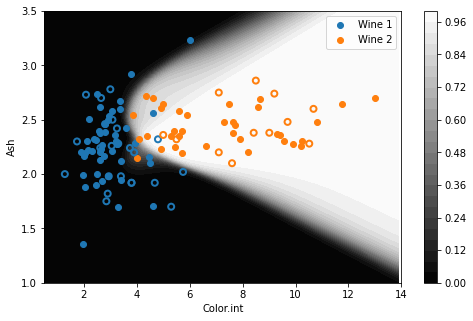

In [ ]:
plt.contourf(xx, yy, probabilities, 25, cmap="gray", vmin=0.0, vmax=1.0)
plt.colorbar()

train_wine_table = data.iloc[train_indices]
wine1 = train_wine_table[train_wine_table["Wine"] == 2]
wine2 = train_wine_table[train_wine_table["Wine"] == 3]
plt.scatter(wine1["Color.int"], wine1["Ash"], label="Wine 1", color="C0")
plt.scatter(wine2["Color.int"], wine2["Ash"], label="Wine 2", color="C1")

test_wine_table = data.iloc[test_indices]
wine1 = test_wine_table[test_wine_table["Wine"] == 2]
wine2 = test_wine_table[test_wine_table["Wine"] == 3]
plt.scatter(wine1["Color.int"], wine1["Ash"], color="C0", facecolors="none", lw=2)
plt.scatter(wine2["Color.int"], wine2["Ash"], color="C1", facecolors="none", lw=2)

plt.xlim([0.5, 14.0])
plt.ylim([1.0, 3.5])
plt.xlabel("Color.int")
plt.ylabel("Ash")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(8, 5)

| Train accuracy | Test accuracy | Learning rate | Layers | Neurons (p.l.) |
| -------------- | ------------- | ------------- | ------ | -------------- |
| 0.9881         | 0.8286        | 1.0           | 2      | 8              |
| 1.0000         | 0.9143        | 1.0           | 4      | 8              |
| 1.0000         | 0.9143        | 1.0           | 2      | 32             |
| 1.0000         | 0.8857        | 1.0           | 4      | 32             |
| 0.9762         | 0.9429        | 0.05          | 2      | 8              |
| 0.9762         | 0.9429        | 0.05          | 4      | 8              |
| 0.9524         | 0.9429        | 0.05          | 2      | 32             |
| 0.9762         | 0.9429        | 0.05          | 4      | 32             |
| 0.9167         | *0.9714*      | 0.001         | 2      | 8              |
| 0.9286         | 0.9143        | 0.001         | 4      | 8              |
| 0.9048         | **1.0000**    | 0.001         | 2      | 32             |
| 0.9286         | 0.9429        | 0.001         | 4      | 32             |